# Chronos T5 


### Data For Chronos T5


In [1]:
import pandas as pd 
token = 'data/BTC-USD.csv'
data = pd.read_csv(token, parse_dates=['Date'], index_col=['Date'])
data.drop(['Adj Close', 'Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)


In [3]:
# Define the prediction length
prediction_length = 30

# Split the data
close_train = data['Close'][:-prediction_length]
close_test = data['Close'][-prediction_length:]
close_test


Date
2024-11-28     95652.468750
2024-11-29     97461.523438
2024-11-30     96449.054688
2024-12-01     97279.789062
2024-12-02     95865.304688
2024-12-03     96002.164062
2024-12-04     98768.531250
2024-12-05     96593.570312
2024-12-06     99920.710938
2024-12-07     99923.335938
2024-12-08    101236.015625
2024-12-09     97432.718750
2024-12-10     96675.429688
2024-12-11    101173.031250
2024-12-12    100043.000000
2024-12-13    101459.257812
2024-12-14    101372.968750
2024-12-15    104298.695312
2024-12-16    106029.718750
2024-12-17    106140.601562
2024-12-18    100041.539062
2024-12-19     97490.953125
2024-12-20     97755.929688
2024-12-21     97224.726562
2024-12-22     95104.937500
2024-12-23     94686.242188
2024-12-24     98676.093750
2024-12-25     99299.195312
2024-12-26     95795.515625
2024-12-27     93925.914062
Name: Close, dtype: float64

### Train Chronos T5 


In [5]:
# Chronos Pipeline using the T5 model for forecasting coming from the Hugging Face library
import torch
from chronos import ChronosPipeline
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
pipeline = ChronosPipeline.from_pretrained(
    'amazon/chronos-t5-small',
    device_map = device,
    torch_dtype = torch.float32
)

context = torch.tensor(close_train, dtype=torch.float32)


forecast = pipeline.predict(context, prediction_length, num_samples=100)

cuda


C:\Users\Ivo\AppData\Local\Temp\ipykernel_15336\4038903903.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(close_train, dtype=torch.float32)


In [7]:
import numpy as np
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
median

array([96776.875     , 96776.875     , 96776.875     , 96776.875     ,
       97157.8671875 , 96776.875     , 97919.8828125 , 97538.8984375 ,
       97919.8828125 , 98300.921875  , 97919.8828125 , 97919.8828125 ,
       97538.8984375 , 97919.8828125 , 97919.8828125 , 97919.8828125 ,
       98300.921875  , 97348.3828125 , 97729.390625  , 97157.88671875,
       98491.4140625 , 97919.8828125 , 97919.8828125 , 98491.4140625 ,
       98872.42578125, 99062.9453125 , 97919.8828125 , 98872.42578125,
       98491.4140625 , 99062.9453125 ])

#### Plots 

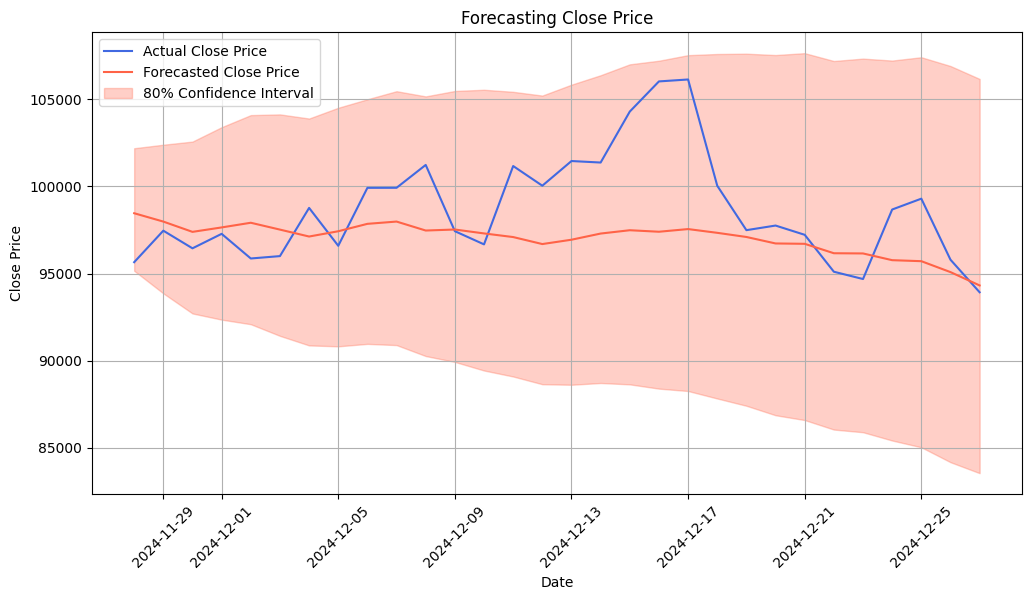

In [17]:
import matplotlib.pyplot as plt

# Plot the forecast with the actual data and the prediction interval
plt.figure(figsize=(12, 6))
plt.plot(close_test.index, close_test.values, label='Actual Close Price', color='royalblue')
plt.plot(close_test.index, median, label='Forecasted Close Price', color='tomato')
plt.fill_between(close_test.index, low, high, color='tomato', alpha=0.3, label='80% Confidence Interval')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasting Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Chronos-bolt-base

In [10]:
import torch
from chronos import BaseChronosPipeline
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
pipeline = BaseChronosPipeline.from_pretrained(
    'amazon/chronos-bolt-base',
    device_map = device,
    torch_dtype = torch.float32
)

context = torch.tensor(close_train, dtype=torch.float32)


forecast = pipeline.predict(context, prediction_length)

cuda


model.safetensors:  96%|#########5| 786M/821M [00:00<?, ?B/s]

c:\Users\Ivo\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ivo\.cache\huggingface\hub\models--amazon--chronos-bolt-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\Ivo\AppData\Local\Temp\ipykernel_15336\2797387708.py:11: FutureWarning: Series.__getitem__ treating keys as posit

In [11]:
import numpy as np
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
median

array([98463.25     , 97983.578125 , 97393.453125 , 97648.125    ,
       97916.296875 , 97523.359375 , 97125.859375 , 97428.59375  ,
       97854.0390625, 97984.59375  , 97470.21875  , 97528.1796875,
       97303.765625 , 97095.15625  , 96693.5390625, 96942.609375 ,
       97296.421875 , 97487.2578125, 97400.609375 , 97553.484375 ,
       97338.390625 , 97100.046875 , 96728.015625 , 96707.53125  ,
       96166.4296875, 96154.515625 , 95768.21875  , 95710.359375 ,
       95083.703125 , 94318.421875 ])

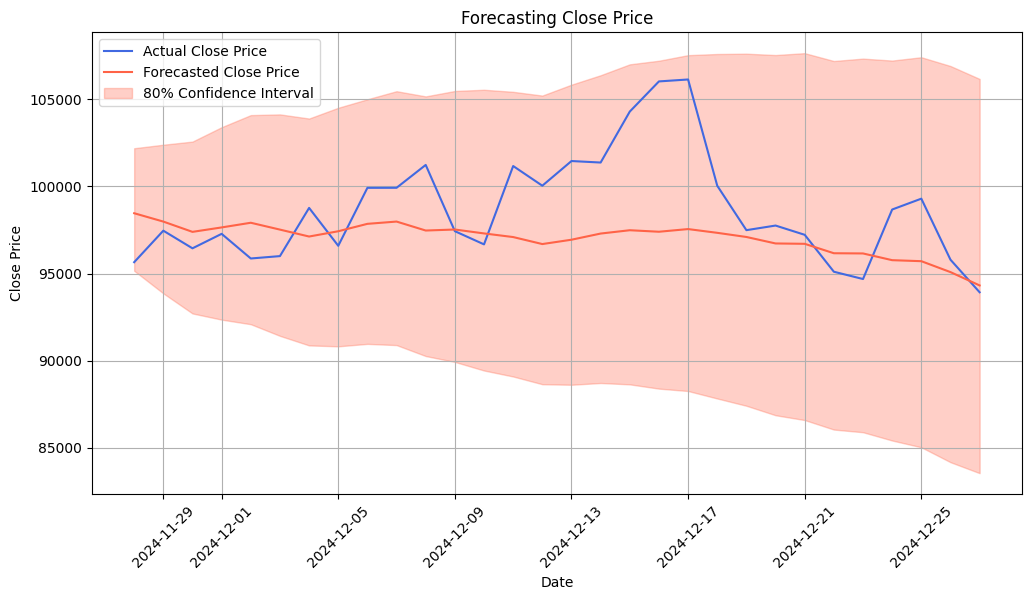

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(close_test.index, close_test.values, label='Actual Close Price', color='royalblue')
plt.plot(close_test.index, median, label='Forecasted Close Price', color='tomato')
plt.fill_between(close_test.index, low, high, color='tomato', alpha=0.3, label='80% Confidence Interval')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasting Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()